# pynams: A Python Package for Nominally Anhydrous Minerals (NAMs)
Code for interpreting the H content in NAMs using FTIR spectra and profiles. 


## Get pynams and basic python scientific and plotting packages
For those new to python, I recommend installing it through [anaconda](https://www.continuum.io/downloads). pynams works with either python 2.7 or 3.

Once you have python, download [pynams](https://github.com/EFerriss/pynams) and install it by going into the Pynams folder on your command line and typing 'python setup.py install'. 

After that you should be able to follow along with the code below anywhere you can run a python script. I like [Jupyter notebooks](http://jupyter.org/) (this format) for quick things that I want to show people and [spyder](https://pythonhosted.org/spyder/) for more involved projects. Both come with anaconda. 

The first and seconds lines make plots show up nicely in a jupyter notebook.  
The third line will let us use some special plotting commands for fiddling with figures later on.  
The fourth line makes my python 2.7 code more compatible with python 3.

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats=["svg"]
import matplotlib.pyplot as plt
from __future__ import print_function, division

# Spectra
Pynams was written to handle **CSV** files of raw transmission FTIR data, but has done ok with txt

In [3]:
import pynams
from pynams import Spectrum

### Here I'm pointing to example data within the pynams folder
FTIR_file_location = pynams.example_FTIR_file_location
spectrum_augite1 = Spectrum(fname='augite1', folder=FTIR_file_location, thickness_microns=876.4)

### Here is an example of how to pass in data from a personal computer
### Mac people note there is no C at the beginning of your path
#FTIR_file_location = 'C:\\Users\\Ferriss\\Documents\\Code\\Pynams\\example_FTIR_spectra\\'
#spectrum_augite1 = Spectrum(fname='augite1', folder=FTIR_file_location, thickness_microns=876.4)


## Plot spectra

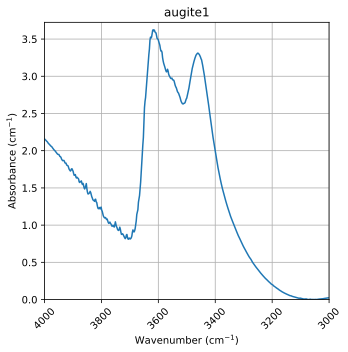

In [4]:
fig, ax = spectrum_augite1.plot_spectrum()

Next we'll plot two spectra on top of each other. 

If you don't like the color scheme, you can either 
* pass a dictionary of style terms through the keyword style.  There are several premade style dictionaries in the pynams module styles
* change the [matplotlib style sheet](http://matplotlib.org/users/style_sheets.html)

The keyword offset moves your spectrum up and down by the specified amount.

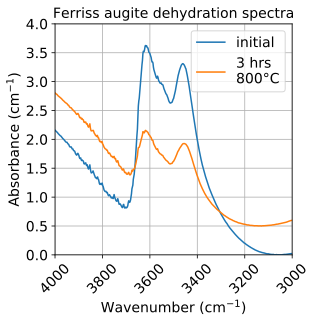

In [5]:
# Making second spectrum called spectrum2 the same way as spectrum above
spectrum_augite2 = Spectrum(fname = 'augite2', thickness_microns = 876.4, folder=FTIR_file_location)

# A larger plot with two spectra and a legend
fig, ax = spectrum_augite1.plot_spectrum(label='initial')
spectrum_augite2.plot_spectrum(axes=ax, label='3 hrs\n800$\degree$C', offset=0.5)
fig.set_size_inches(5, 5)

# the y-axis limits should be set to whatever is appropriate for your spectra
ax.set_ylim(0, 4.)

ax.set_title('Ferriss augite dehydration spectra', fontsize=14)
hleg = ax.legend(loc=1, fontsize=14) 

# change font sizes
# this line is why we imported matplotlib.pyplot at the beginning
plt.tick_params(axis='both', which='major', labelsize=14) 

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

# Thicknesses
## Method 1: Input thickness directly, as above
## Method 2: Input the sample and infrared ray path (thickness direction)
This example uses data from [Ferriss et al. 2016](http://link.springer.com/article/10.1007/s00410-016-1262-8)

In [6]:
from pynams import Sample
Kunlun_diopside_K4 = Sample(length_a_microns=7000, length_b_microns=[2185, 2190, 2188, 2185, 2188],
                            length_c_microns=[1546, 1551, 1536, 1548, 1548])
folder=''.join((FTIR_file_location, 'KunlunDiopside_K4_initial\\'))
spectrum_diopside = Spectrum(fname='K4q_cdb01', folder=folder, sample=Kunlun_diopside_K4, raypath='b')
print(spectrum_diopside.thickness_microns)

2187.2


## Method 3: Estimate the thickness from SiO overtones - olivine only
This method is for transmission FTIR spectra and uses Eq 1 of Matveev and Stachel 2007. For reflectance spectra, see Wysoczanski and Tani 2006.    

In [7]:
spectrum_olivine = Spectrum(folder=FTIR_file_location, fname='olivine1')
spectrum_olivine.get_thickness_from_SiO()

360.34533783355886

# Guess the orientation of an olivine
Lemaire et al. 2004 Figure 1 shows typical O-H stretches and 2nd order Si-O overtones for FTIR spectra for olivine with light polarized in different directions. spectrum.orientation(), produces a plot zoomed in on the relevant Si-O peaks with labeled lines for the major peaks shown in the Lemaire figure. This example is probably oriented with the electric vector || c.

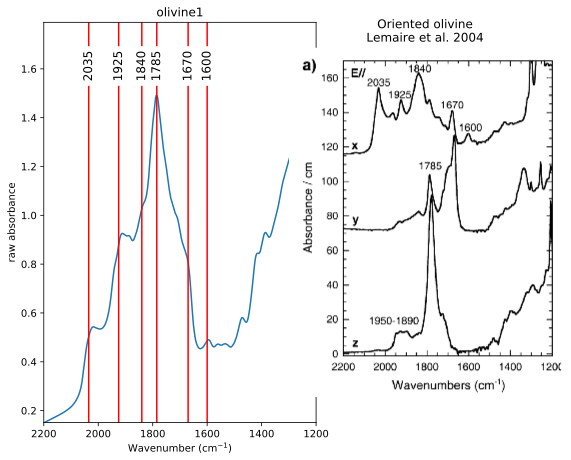

In [8]:
fig = spectrum_olivine.orientation()
fig.set_size_inches(8, 8)

# Baselines

## Linear baseline (default)


Making the default linear baseline.
Use Spectrum.make_baseline for other baselines.


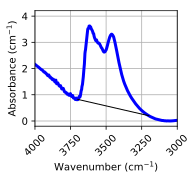

In [9]:
fig, ax = spectrum_augite1.plot_showbaseline()

## Quadratic baselines

The wavenumber range of the baseline is set by the keywords wn_high and wn_low, which default to 3700 and 3200 cm-1.

The keyword force_though_wn will force a fit though quadratic line through the curve at that wavenumber or list of wavenumbers.

Or tell it how much to shift the quadrtic curve away from being a line using the curvature keyword. 

fitting x values: [ 3700.789  3500.     3399.943]
fitting y values: [ 0.82493154  2.70567549  1.98328845]


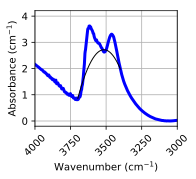

In [10]:
spectrum_augite1.make_baseline(force_through_wn=3500, wn_low=3400, show_fit_values=True)
fig, ax = spectrum_augite1.plot_showbaseline()

fitting x values: [ 3700.789  3550.     3000.744]
fitting y values: [ 0.82493154  0.35228569  0.02341511]


(0, 5)

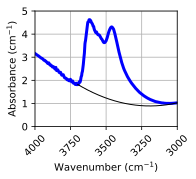

In [11]:
spectrum_augite1.make_baseline(curvature=0.3, wn_low=3000, show_fit_values=True, show_plot=False)
fig, ax = spectrum_augite1.plot_showbaseline(offset=1)
ax.set_ylim(0, 5)

## Splines
Uses the [scipy 1D interpolations](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) and a default spline kind='cubic'.  

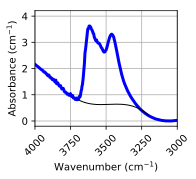

In [12]:
spectrum_augite1.make_baseline(linetype='spline')
fig, ax = spectrum_augite1.plot_showbaseline()

## Higher order polynomial baselines

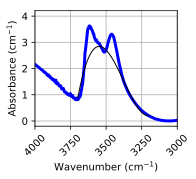

In [13]:
spectrum_augite1.make_baseline(force_through_wn=[3500, 3300], wn_low=3200, polynomial_order=3)
fig, ax = spectrum_augite1.plot_showbaseline()

## Baselines for noisy spectra
The keywords abs_smear_high and abs_smear_low will 'smear' the absorbance around the high and low baseline wavenumbers by fitting through the average absorbance near wn_high and wn_low. Higher abs_smears average over more wavenumbers

(0, 0.3)

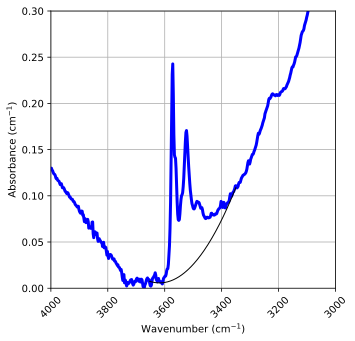

In [14]:
spectrum_noisy_olivine = Spectrum(folder=FTIR_file_location, fname='olivine4', thickness_microns=360.)
spectrum_noisy_olivine.make_baseline(wn_high=3655, abs_smear_high=10, wn_low=3350, abs_smear_low=10, curvature=0.03)
fig, ax = spectrum_noisy_olivine.plot_showbaseline()
fig.set_size_inches(6, 6)
ax.set_ylim(0, 0.3)

## Save your baseline

In [15]:
spectrum_augite1.save_baseline()

Saved pynams\example_FTIR_spectra\augite1-baseline.CSV


## Get your saved baseline

In [16]:
spectrum_augite1.get_baseline();

Got baseline pynams\example_FTIR_spectra\augite1-baseline.CSV


## Subtract the baseline

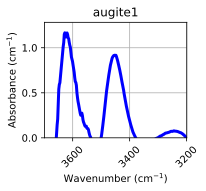

In [17]:
fig, ax = spectrum_augite1.plot_subtractbaseline()

## The area between the curve and the baseline
Use wn_low and wn_high keywords to set the wavenumber range over which to calculate the area. The default includes all area between the curve and the baseline.

Got baseline pynams\example_FTIR_spectra\augite1-baseline.CSV
augite1
area: 58.2 /cm^2


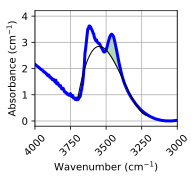

In [18]:
spectrum_augite1.get_baseline();
spectrum_augite1.get_area_under_curve(show_plot=True, wn_low=3400, wn_high=3500);

## A very rough estimate of the water content
Defaults are phase='cpx', calibration='Bell', and scale_water (how much to multiply the resulting water concentration by to account for areas in spectra in different direction that weren't measured) of 3.

These results are not really to be trusted, but will give you a very rough estimate. See, e.g., Rossman 2006 review.

The reported errors are based *only* on propagated error from the absorption coefficients and do not include the large (30%?) uncertainties associated with baseline choice and the potentially even larger errors associated with using unpolarized radiation (Withers 2013).

In [19]:
spectrum_augite1.water(printout=True, phase='cpx', calibration='Bell')
spectrum_noisy_olivine.water(printout=True, phase='ol', calibration='Withers', scale_water=2.1);

augite1
water: 16.4+/-0.7 ppm H2O
 *3 = 49.2+/-2.2 ppm H2O
olivine4
water: 1.6+/-0.1 ppm H2O
 *2.1 = 4.8+/-0.2 ppm H2O


# Profiles
## Make your Profile
fnames are the same as in Spectrum objects - the file name without the .CSV extension.

In [20]:
from pynams import Profile

profile = Profile(profile_name='My first FTIR profile', 
                  fnames=['olivine1', 'olivine2', 'olivine3', 'olivine4'],  
                  folder=FTIR_file_location, 
                  thicknesses_microns=300., 
                  positions_microns=[10., 20., 30., 40.])

## Estimate thicknesses across an olivine profile

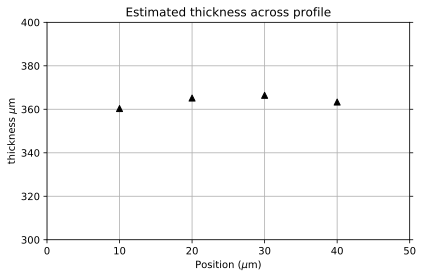

In [21]:
profile.get_thicknesses_from_SiO()
from pynams import styles
fig, ax, ax_water = styles.plot_area_profile_outline(show_water_ppm=False)
ax.set_ylabel('thickness $\mu$m')
ax.plot(profile.positions_microns, profile.thicknesses_microns, '^k')
ax.set_ylim(300, 400)
ax.set_xlim(0, 50)
ax.set_title('Estimated thickness across profile');

## Make baselines and area profiles

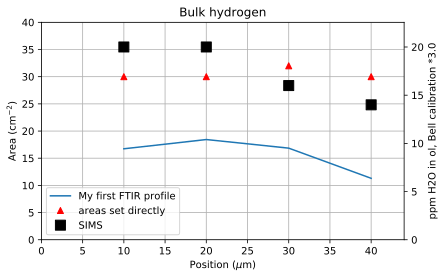

In [22]:
# make quadratic baselines. Keywords are the same as in spectrum.make_baseline() above
profile.make_baselines(wn_low=3100, wn_high=3600., force_through_wn=3300)
#profile.plot_showbaselines() # uncomment this out if you want to look at the baselines

# This happens automatically during plotting if profiles.areas hasn't been set yet
profile.make_area_list()

# plot the profile area. Use top keyword to change the y-axis on both axes
fig, ax, ax_water = profile.plot_area_profile(show_water_ppm=True, centered=False, phase='ol',
                                              calibration='Bell', scale_water=3., top=40)

# If you want to use your own area estimates, you can set them directly
profile.areas = [30, 30, 32, 30]
profile.plot_area_profile(axes=ax, centered=False, label='areas set directly',
                          style=styles.style_points1)

# Now let's add your lovely SIMS data
# Note that I'm plotting on ax_water. If you use ax, the SIMS data plots on the left axis. 
SIMS_data = [20, 20, 16, 14]
ax_water.plot(profile.positions_microns, SIMS_data, 'sk', markersize=10, label='SIMS')

ax.legend(loc=3);

## Average all the spectra across the profile

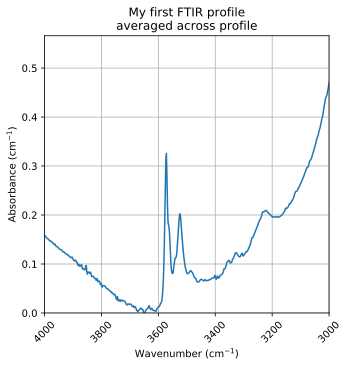

In [23]:
avespec = profile.average_spectra()
avespec.get_thickness_from_SiO()
fig, ax = avespec.plot_spectrum()

## Save a spectrum
This function defaults to saving the absorbance per cm in the .txt format preferred by the [PULI database](http://puli.mfgi.hu/), but if you just want to save a synthetic spectrum, e.g., the result of averaging the profile above, you can change the defaults so it looks like a regular CSV that you can load whenever you want it later.



In [24]:
avespec.fname = 'testsave'
avespec.save_spectrum(folder=FTIR_file_location)
avespec.save_spectrum(folder=FTIR_file_location, delim=',', file_ending='.CSV', raw_data=True)

Saved pynams\example_FTIR_spectra\testsave-per-cm.txt
Saved pynams\example_FTIR_spectra\testsave.CSV


# Multiple baselines
Perhaps you want to make a baseline and then not have to re-make it every time you want to plot the areas. Perhaps you are using different baselines to come up with rough peak-specific area profiles. Perhaps you want a sense for the range of the calculated area given different baselines. You need a way to handle multiple sets of baselines.

## Save a baseline

Saved pynams\example_FTIR_spectra\augite1-baseline2.CSV


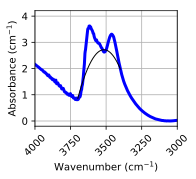

In [25]:
spectrum_augite1.make_baseline(wn_low=3400, force_through_wn=3500)
spectrum_augite1.plot_showbaseline()
spectrum_augite1.save_baseline(folder=FTIR_file_location, baseline_ending='-baseline2.CSV')

Saved pynams\example_FTIR_spectra\augite1-linearbaseline.CSV


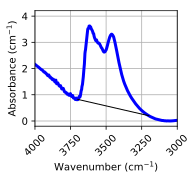

In [26]:
# make a linear baseline and save it under a different name
spectrum_augite1.make_baseline()
spectrum_augite1.plot_showbaseline()
spectrum_augite1.save_baseline(folder=FTIR_file_location, baseline_ending='-linearbaseline.CSV')

## Get saved baselines

Got baseline pynams\example_FTIR_spectra\augite1-baseline.CSV


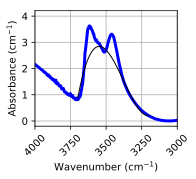

In [27]:
spectrum_augite1.get_baseline(folder=FTIR_file_location)
fig, ax = spectrum_augite1.plot_showbaseline()

Got baseline pynams\example_FTIR_spectra\augite1-linearbaseline.CSV


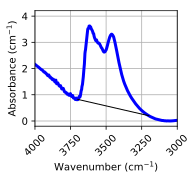

In [28]:
spectrum_augite1.get_baseline(folder=FTIR_file_location, baseline_ending='-linearbaseline.CSV')
fig, ax = spectrum_augite1.plot_showbaseline()

## Save and retrieve all baselines in a profile

In [29]:
profile.save_baselines(folder=FTIR_file_location)

Saved pynams\example_FTIR_spectra\olivine1-baseline.CSV
Saved pynams\example_FTIR_spectra\olivine2-baseline.CSV
Saved pynams\example_FTIR_spectra\olivine3-baseline.CSV
Saved pynams\example_FTIR_spectra\olivine4-baseline.CSV


In [30]:
profile.get_baselines(folder=FTIR_file_location)

Got baseline pynams\example_FTIR_spectra\olivine1-baseline.CSV
Got baseline pynams\example_FTIR_spectra\olivine2-baseline.CSV
Got baseline pynams\example_FTIR_spectra\olivine3-baseline.CSV
Got baseline pynams\example_FTIR_spectra\olivine4-baseline.CSV


# [Click here for diffusion modeling with pynams](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES_diffusion.ipynb)

# [Click here for peak fitting with pynams](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES_peakfitting.ipynb)